Rutuja Kute 

02711730

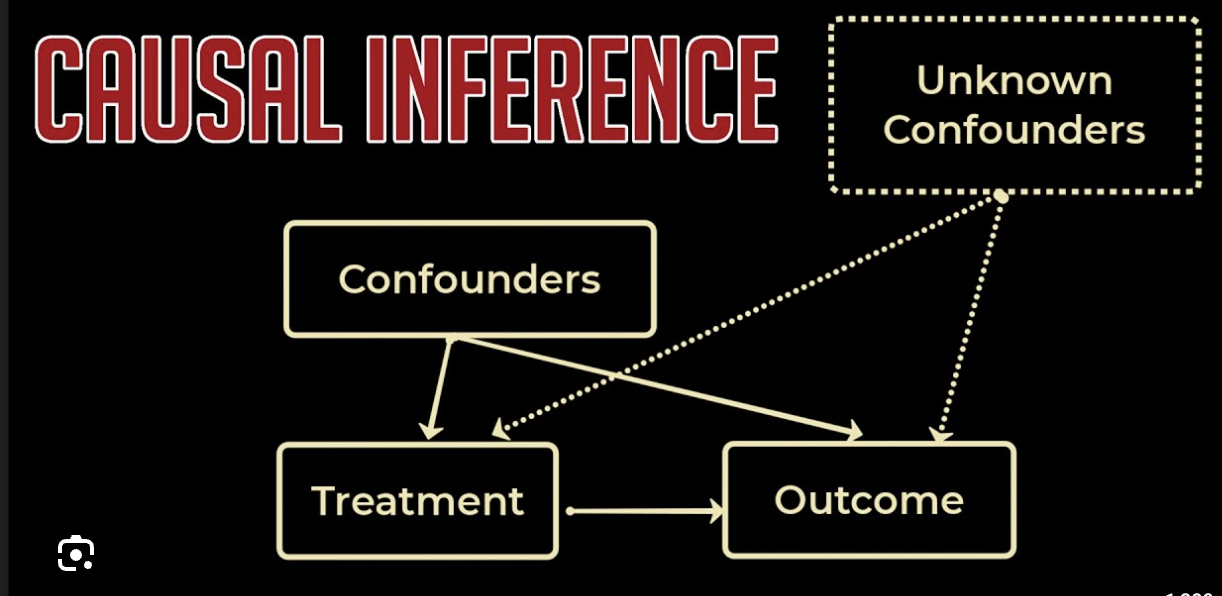

# Understanding Causality in Data Science

## What is Causality?

Causality refers to the relationship between cause and effect. It is the principle that one event (the cause) brings about another event (the effect). In data science, understanding causality is essential for making informed decisions and predictions based on observational data.

## Key Concepts:

### Treatments:

- Treatments are the variables or interventions that are manipulated or administered to subjects in a study.
- They represent the factors or conditions whose effects we are interested in understanding or estimating.

### Outcome:

- The outcome variable is the response or measure of interest that we aim to study or predict.
- It represents the effect of the treatment(s) on the subjects.

### Confounders:

- Confounders are variables that are associated with both the treatment and the outcome.
- They can distort the observed relationship between the treatment and the outcome if not properly accounted for.
- Controlling for confounders is crucial to estimate the causal effect accurately.

## Estimating Causality:

Causal inference aims to estimate the causal effect of a treatment on an outcome variable while accounting for confounding factors. Several methods can be used for causal inference:

1. **Randomized Controlled Trials (RCTs)**:
   - Gold standard method for estimating causality.
   - Subjects are randomly assigned to treatment and control groups, minimizing confounding effects.

2. **Observational Studies**:
   - When RCTs are not feasible, observational studies can be used.
   - Methods such as Propensity Score Matching, Instrumental Variables, and Regression Adjustment are employed to control for confounders.

3. **Counterfactual Framework**:
   - Causal inference often involves comparing what happened (the observed outcome) with what would have happened (the counterfactual outcome) if a different treatment had been received.
   - This framework allows us to estimate the causal effect by comparing outcomes under different treatment conditions.

## Conclusion:

Understanding causality and estimating causal effects are fundamental tasks in data science and decision-making. By carefully designing studies and employing appropriate causal inference methods, we can gain valuable insights into the effects of treatments on outcomes while accounting for confounding factors.


## Problem Statement: Causal Inference to Determine the Impact of Property Size on Prices

**Objective**: 
To investigate whether properties with more rooms are associated with higher prices, while accounting for potential confounding factors.

**Treatment**:
The treatment variable under consideration is the number of rooms (`rm`) in a property. This variable serves as an indicator of the property size or spatial capacity.

**Outcome**:
The outcome variable of interest is the property prices, represented by the median value of owner-occupied homes (`medv`). This variable reflects the market valuation of properties and serves as a measure of their financial worth.

**Confounder**:
The confounding variable in this analysis is the percentage of lower status population (`lstat`) in the neighborhood. Lower socioeconomic status areas might have different property prices and number of rooms, which could confound the relationship between property size and prices.

**Research Question**:
Is there a causal relationship between the number of rooms in a property and its prices, after accounting for the influence of the percentage of lower status population in the neighborhood?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.validation import column_or_1d

## About Dataset
crim: Per capita crime rate by town.

zn: Proportion of large residential lots (over 25,000 sq. ft.).

indus: Proportion of non-retail business acres per town.

Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).

nox: Concentration of nitrogen oxides in the air.

rm: Average number of rooms per dwelling.

age: Proportion of old owner-occupied units built before 1940.

dis: Weighted distances to Boston employment centers.

rad: Index of accessibility to radial highways.

tax: Property tax rate per $10,000.

In [4]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
# Impute missing values using mean
df.fillna(df.mean(), inplace=True)

# Verify that there are no missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after_imputation)


Missing Values After Imputation:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df[df.duplicated()==True]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


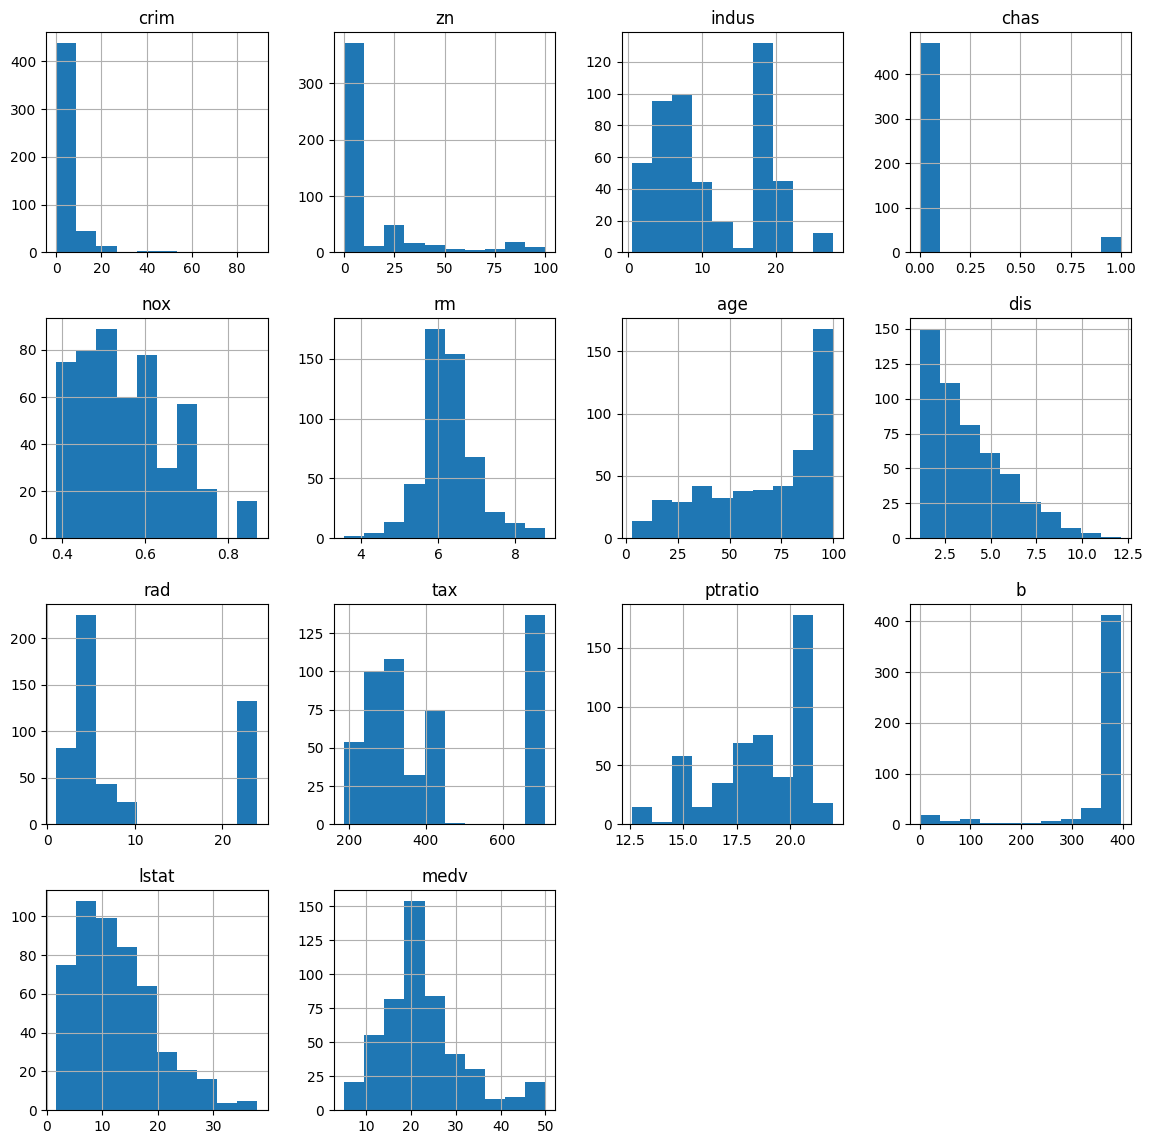

In [11]:
df.hist(figsize=(14, 14))
plt.show()

## Observations
Crime Rate (CRIM): The histogram shows a bimodal distribution with peaks around 0.0 and 0.7. This suggests there might be two groups of neighborhoods, some with low crime rates and some with high crime rates.

Proportion of Residential Land Zoned for Lots Over 25,000 Sq. Ft. (ZN): The distribution appears skewed to the left, with more areas having a lower proportion of residentially zoned land for large lots and a few areas with a higher proportion.

Nitric Oxides Concentration (NOX): The distribution leans to the right, with most areas having lower concentrations of nitrogen oxides and a few areas with higher concentrations.

Average Number of Rooms Per Dwelling (RM): This distribution appears relatively normal, with most houses having around an average number of rooms and a few outliers on either side.

Proportion of Owner-Occupied Units Built Before 1940 (AGE): The distribution is skewed to the right, with most areas having a lower proportion of older units and a few areas with a higher proportion.

Weighted Distances to Five Boston Employment Centers (DIS): The distribution is difficult to determine precisely from the graph, but it appears to be somewhat normal, with most areas having average distances and a few outliers on either side.

Full-Value Property Tax Rate per $10,000 (TAX): The distribution leans right, with most properties having lower tax rates and a few with higher tax rates.

Pupil-Teacher Ratio (PTRATIO): The distribution appears skewed to the left, with most areas having lower pupil-teacher ratios and a few with higher ratios.

Median Value of Owner-Occupied Homes (MEDV): The distribution is difficult to determine precisely from the graph, but it appears somewhat normal.

LSTAT Percentage: The distribution leans right, with most areas having a lower percentage of lower socioeconomic status and a few with a higher percentage.

Note about CHAS: As mentioned before, the distribution of the Charles River binary variable (CHAS) is difficult to determine from the graph since it only has two possible values (0 and 1). It likely shows that most houses are not located by the Charles River (0) with a  few on the riverfront (1).

## Univariate Analysis of categorical Variables identified

In [12]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))
    print("*"*50)

crim
0.01501     0.003953
14.33370    0.003953
0.03466     0.001976
0.03113     0.001976
0.03049     0.001976
              ...   
1.51902     0.001976
1.83377     0.001976
1.46336     0.001976
1.27346     0.001976
0.04741     0.001976
Name: proportion, Length: 504, dtype: float64
**************************************************
zn
0.0      0.735178
20.0     0.041502
80.0     0.029644
22.0     0.019763
12.5     0.019763
25.0     0.019763
40.0     0.013834
45.0     0.011858
30.0     0.011858
90.0     0.009881
95.0     0.007905
60.0     0.007905
21.0     0.007905
33.0     0.007905
55.0     0.005929
70.0     0.005929
34.0     0.005929
52.5     0.005929
35.0     0.005929
28.0     0.005929
75.0     0.005929
82.5     0.003953
85.0     0.003953
17.5     0.001976
100.0    0.001976
18.0     0.001976
Name: proportion, dtype: float64
**************************************************
indus
18.10    0.260870
19.58    0.059289
8.14     0.043478
6.20     0.035573
21.89    0.029644
           ...  

 ### Bivariate and Multivariate Analysis¶

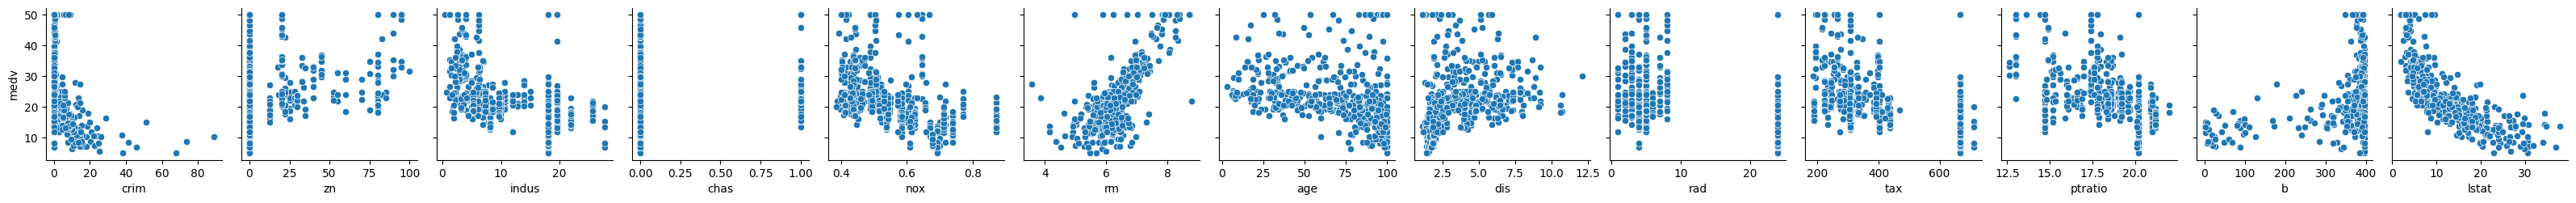

In [13]:
import seaborn as sns

# Assuming df is your DataFrame
sns.pairplot(df, x_vars=df.columns.drop('medv'), y_vars=['medv'], kind='scatter')
plt.show()

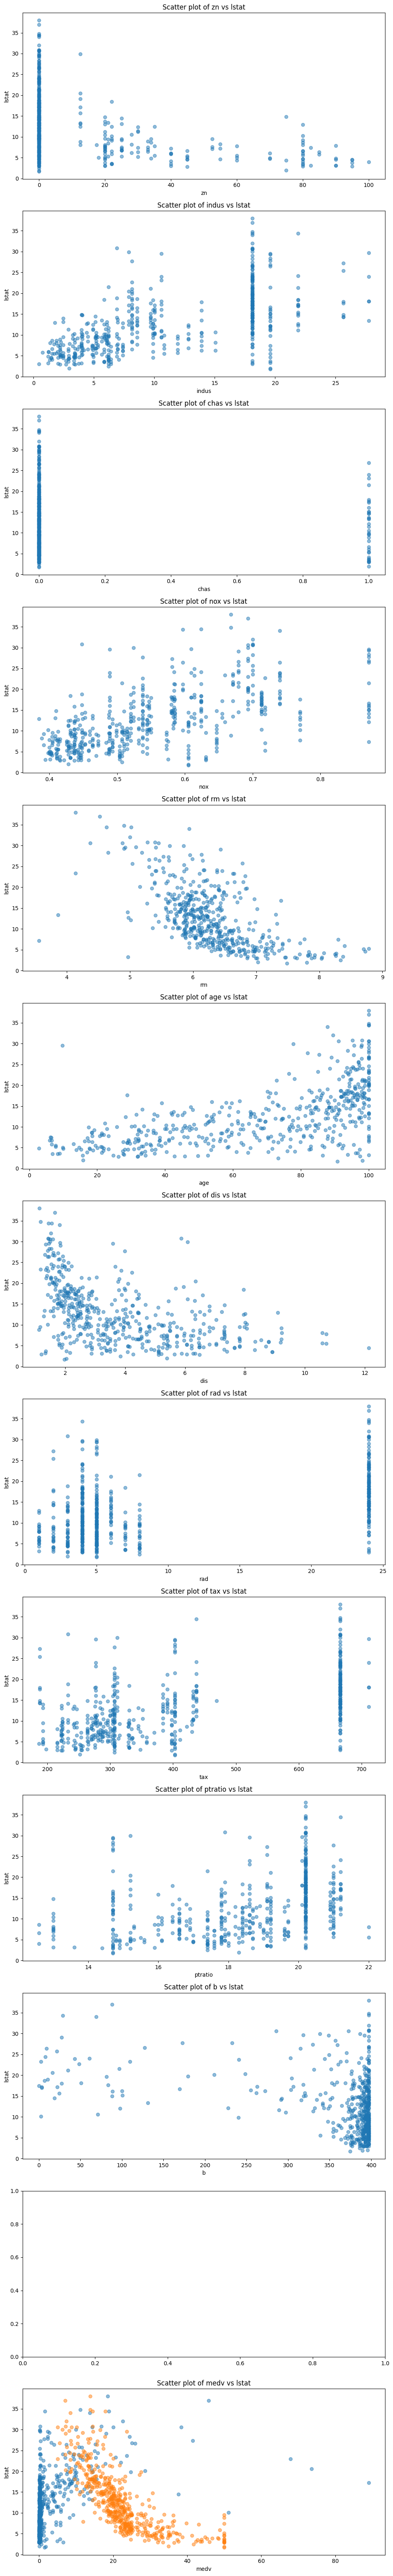

In [14]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'medv' is one of the columns
fig, axs = plt.subplots(len(df.columns) - 1, 1, figsize=(10, 5 * (len(df.columns) - 1)))

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    if column != 'lstat':  # Skip 'medv' column itself
        axs[i - 1].scatter(df[column], df['lstat'], alpha=0.5)  # Plot scatter plot
        axs[i - 1].set_xlabel(column)  # Set x-axis label to column name
        axs[i - 1].set_ylabel('lstat')  # Set y-axis label to 'medv'
        axs[i - 1].set_title(f'Scatter plot of {column} vs lstat')  # Set title

plt.tight_layout()
plt.show()


In [15]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


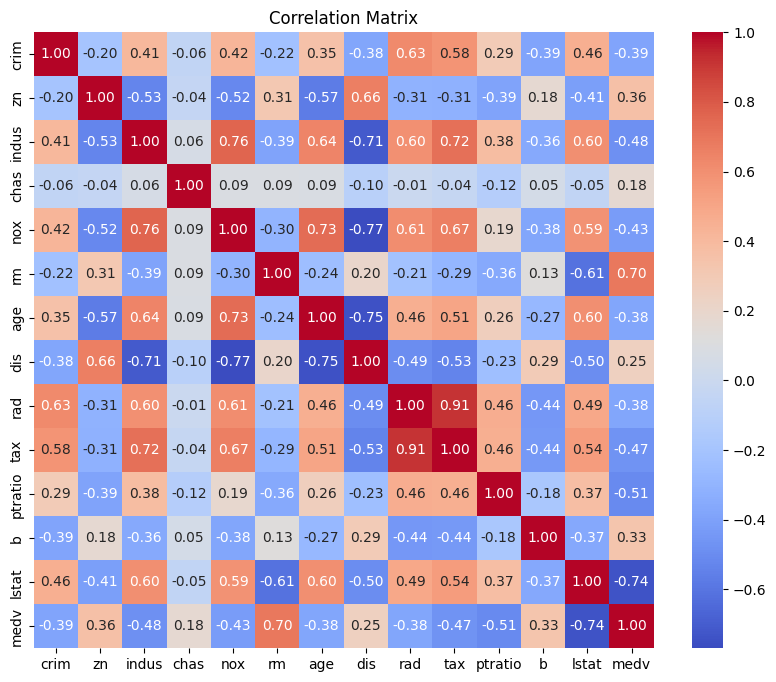

In [16]:
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

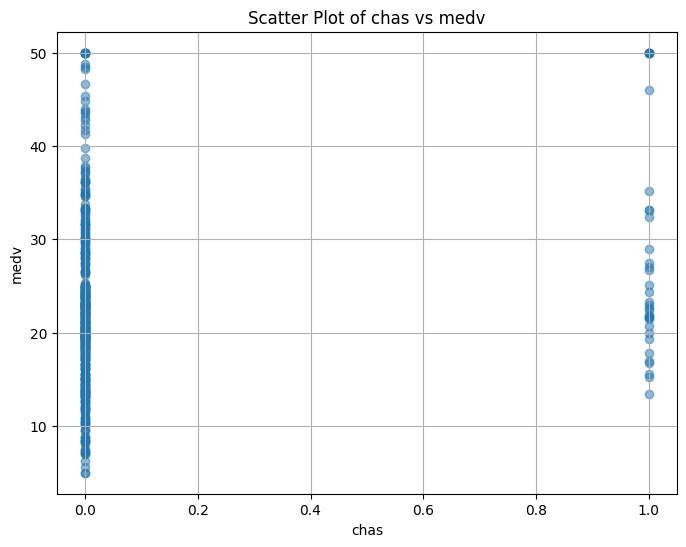

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['chas'], df['medv'], alpha=0.5)
plt.title('Scatter Plot of chas vs medv')
plt.xlabel('chas')
plt.ylabel('medv')
plt.grid(True)
plt.show()

## Problem statement : Acheiving causal inference  to find out if property near charles river is expensive
 #### Treatment : rm
 #### outcome : prices (medv)
 
 

# 1. DAG

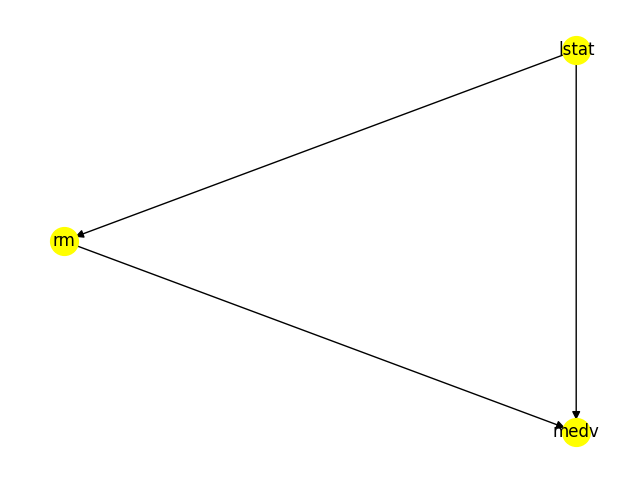

In [18]:
import pandas as pd
import dowhy
from dowhy import CausalModel



# Create a causal model
model = CausalModel(
    data=df,
    treatment='rm',    # Treatment: Number of rooms
    outcome='medv',    # Outcome: prices of homes
    common_causes=['lstat']  # Confounder: Crime rate
)

# Define the causal graph (DAG)
model.view_model()


2. Identification

In [19]:

# Identify causal effect estimands
identified_estimand = model.identify_effect()

# Print the identified estimands
print(identified_estimand)



Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                 
─────(E[medv|lstat])
d[rm]               
Estimand assumption 1, Unconfoundedness: If U→{rm} and U→medv then P(medv|rm,lstat,U) = P(medv|rm,lstat)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# 3. Estimation

In [20]:
# Estimate the Average Treatment Effect (ATE)
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", confidence_intervals = True, test_significance = True)

# Print the estimated ATE
print("Average Treatment Effect (ATE):", estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
Average Treatment Effect (ATE): 5.0950435856120295


/opt/homebrew/Cellar/jupyterlab/4.1.2/libexec/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Estimand Type: The estimand type is nonparametric-ate, indicating that a nonparametric approach was used to estimate the Average Treatment Effect.

Estimand Expressions: The output provides expressions for different types of estimands:

Estimand 1 (backdoor): This estimand represents the Average Treatment Effect (ATE) estimated using the backdoor criterion, which aims to control for confounding variables (lstat in this case) that might influence both the treatment (rm) and the outcome (medv).
Estimand Assumptions: The estimand assumption 1, Unconfoundedness, states that if there are no unobserved confounders (U) influencing both the treatment (rm) and the outcome (medv), then the conditional probability of the outcome given the treatment and confounders is equal to the conditional probability of the outcome given the treatment and confounders.

Estimand Name: Estimands 2 and 3 (iv and frontdoor) are not applicable in this context because no instrumental variables or frontdoor variables were found in the causal graph.

Estimation Method: The estimation method used is linear_regression, which implies that a linear regression model was used to estimate the Average Treatment Effect.

Estimation Parameters: The estimation parameters include the control value (0), treatment value (1), target units (ate for Average Treatment Effect), and effect modifiers (none specified).

Average Treatment Effect (ATE): The estimated Average Treatment Effect (ATE) is approximately 5.095. This value represents the average difference in the outcome (medv) for each unit increase in the treatment (rm), while controlling for the confounding variable (lstat).

From this analysis, we can conclude that increasing the number of rooms (rm) in a property is associated with an increase in the median value of owner-occupied homes (medv), on average, by approximately 5.095 units. However, this conclusion assumes that there are no unobserved confounders influencing both the number of rooms and the median value of homes. Further sensitivity analysis and robustness checks may be needed to validate the causal inference findings.

# References


https://www.pywhy.org/dowhy/v0.9.1/example_notebooks/dowhy_simple_example.html#

https://pandas.pydata.org

https://graphviz.org/

https://seaborn.pydata.org/

https://www.w3schools.com/python/matplotlib_pyplot.asp
h
ttps://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data

MIT License

Copyright (c) 2024 Rutuja Kute

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


## Abstracts:

- **DoWhy Simple Example**: Demonstrates the usage of DoWhy, a Python library for causal inference, with a straightforward example.
- **Pandas Documentation**: Comprehensive documentation for Pandas, a powerful data manipulation and analysis library in Python.
- **Graphviz**: Graphviz documentation, offering tools for creating and visualizing graph structures, which can be particularly useful for causal graphs.
- **Seaborn**: Documentation for Seaborn, a Python visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
- **Matplotlib Pyplot**: A tutorial from W3Schools focusing on Matplotlib's Pyplot module, which is widely used for creating static, animated, and interactive visualizations in Python.
- **Kaggle Dataset - Employee Attrition Data**: A Kaggle dataset containing information about employee attrition, offering valuable insights into factors contributing to employee turnover in various organizations.
- **Kaggle Dataset - Boston Property Dataset**: The Boston Property dataset provides comprehensive information about properties in Boston, including property characteristics, location details, and assessed property values.

## References:

- **DoWhy**: "DoWhy: An End-to-End Library for Causal Inference" by NeurIPS 2019 Proceedings
- **Pandas**: McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference.
- **Graphviz**: Ellson, J., Gansner, E., Koutsofios, L., North, S. C., & Woodhull, G. (2002). Graphviz - Open Source Graph Drawing Tools. AT&T Labs.
- **Seaborn**: Waskom, M. (2021). seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021.
- **Matplotlib**: Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.
- **Kaggle Dataset - Employee Attrition Data**: HR Analytics: Job Change of Data Scientists by Athanasios Kyritsis, Kaggle Dataset
- **Kaggle Dataset - Boston Property Dataset**: Compiled by the author, this dataset provides information about properties in Boston, sourced from public records and property assessments.

## Licenses:

- **DoWhy**: MIT License
- **Pandas**: BSD 3-Clause License
- **Graphviz**: Common Public License Version 1.0
- **Seaborn**: BSD 3-Clause License
- **Matplotlib**: Matplotlib License (BSD-compatible)
- **Kaggle Dataset - Employee Attrition Data**: Attribution 4.0 International (CC BY 4.0)
- **Kaggle Dataset - Boston Property Dataset**: Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
